# Analyzing the Fandango reviews webpage

In 2015, Hickey released an article explaining how Fandango reviews were coneniently rounded up, ignoring the real reviews given by the public. 

This project analyzes if Fandango has corrected the 'bug' that they claimed caused the rounding.

In [1]:
!ls

analyzing_fandango_db.Rmd    fandango_score_comparison.csv
analyzing_fandango_db.ipynb  movie_ratings_16_17.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hickey_fandango = pd.read_csv('fandango_score_comparison.csv')
fixed_fandango = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
hickey_fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
fixed_fandango.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


The two datasets have different attributes. The Hickey dataset contains reviews from different movie rating sites. The fixed_fandango contain the reviews from metascore, imdb and the fandango site, and also the normalized values (i.e. in a scale of stars).

In [7]:
hickey_only_fan = hickey_fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fixed_only_fan = fixed_fandango[['movie', 'year', 'fandango']]

In [8]:
fixed_only_fan['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

The 'fixed_fandango' dataset only contains movies from 2016 and 2017, so it's not a representative set of the Fandango DB.
The 'hickey_fandango' only contains movies with tickets sold during 2015, so it's not representative either.

Due to the fact that the datasets are only for recent and popular moves, the scope of the notebook changes only to analyzing rating differences betwwen 2015 and 2016. 

In order to make both datasets as similar as they can, movies with more than 30 reviews will be consideerate 'popular'.

The result below shows that there is no movie that has less than 30 ratings. 

In [9]:
hickey_fandango[hickey_fandango['Fandango_votes'] < 30 ].shape

(0, 22)

The 'fixed' data set don't have an attribute specifying the number of reviews. A solution is take a random sample of at least the 10% and manually checking the percentage of movies from the sample that has more than 30 reviews. 

In [10]:
fixed_only_fan.sample(10)

,movie,year,fandango
93,Kung Fu Panda 3,2016,4.5
144,Sing Street,2016,4.5
33,Cell,2016,3.0
200,Triple 9,2016,3.5
138,Rings,2017,3.0
43,Doctor Strange,2016,4.5
141,Sausage Party,2016,3.5
86,Julieta,2016,3.5
62,Ghostbusters,2016,4.0
109,Midnight Special,2016,3.5


The fixed data set contains a 'Year' attribute to segregate only 2016 movies, but the hickey's dataset don't, so the column has to be created

In [11]:
 hickey_only_fan['Year'] = hickey_only_fan['FILM'].str[-5:-1]

/home/dum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The hickey's dataset have 129 movies from 2015

In [12]:
hickey_only_fan['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

To clean the dataset, only 2015 and 2016 movie reviews are segregated

In [13]:
hickey_2015_fandang = hickey_only_fan[hickey_only_fan['Year'] == '2015']
fixed_2016_fandang = fixed_only_fan[fixed_only_fan['year'] == 2016]

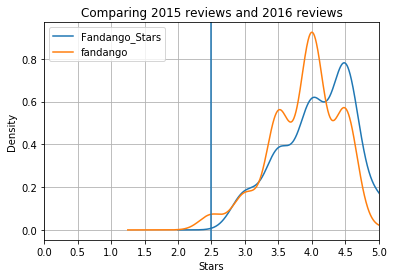

In [14]:
hickey_2015_fandang['Fandango_Stars'].plot.kde()
fixed_2016_fandang['fandango'].plot.kde()
plt.title('Comparing 2015 reviews and 2016 reviews')
plt.axvline(2.5)
plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, .5))
plt.grid()
plt.legend()

Both distributions are left skwed, one seems to have an average at 4.0 and the other at 4.5. The 2016 seems to follow the normalized distribution better. It also seems that, on average, the 2016 have a lower ratings compared to movies on the 2017. 



In [15]:
hickey_2015_fandang['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [16]:
fixed_2016_fandang['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

 In 2016, the quartile rank for the 75th quartile is 4.25. In 2015, the quartile rank for the 75th quartile is 4.5. This means that in 2016, movies are better distributed in the upper quartiles, with 25% of the data between 4.25 and 5, in contrast to 2015, that has the upper 25 % of the data between 4.5 and 5.

In [17]:
(hickey_2015_fandang['Fandango_Stars'].value_counts(normalize = True) * 100).sort_index()

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
(fixed_2016_fandang['fandango'].value_counts(normalize = True) * 100).sort_index()

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016 there are movies with 2.5 stars and there is an important increase in 3.5 and 4.0 ratings with a decrease of ratings in 4.5 and most importantly in 5.0 ratings.

In [19]:
print('2015')
print('Mean', hickey_2015_fandang['Fandango_Stars'].mean())
print('Mode', hickey_2015_fandang['Fandango_Stars'].mode())
print('Median', hickey_2015_fandang['Fandango_Stars'].median())

2015
Mean 4.0852713178294575
Mode 0    4.5
dtype: float64
Median 4.0


In [20]:
print('2016')
print('Mean', fixed_2016_fandang['fandango'].mean())
print('Mode', fixed_2016_fandang['fandango'].mode())
print('Median', fixed_2016_fandang['fandango'].median())

2016
Mean 3.887434554973822
Mode 0    4.0
dtype: float64
Median 4.0


The mode and mean have moved to the left. The median is the same for both distributions.

In [21]:
central_tendency = pd.DataFrame()
central_tendency['2015'] = [hickey_2015_fandang['Fandango_Stars'].mean()
,hickey_2015_fandang['Fandango_Stars'].mode()[0]
,hickey_2015_fandang['Fandango_Stars'].median()]

central_tendency['2016'] = [fixed_2016_fandang['fandango'].mean(),fixed_2016_fandang['fandango'].mode()[0],fixed_2016_fandang['fandango'].median()]

central_tendency.index = ['mean', 'mode', 'median']

In [22]:
central_tendency

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


Text(0.5, 1.0, 'Comparing 2015 and 2016 central tendency measures')

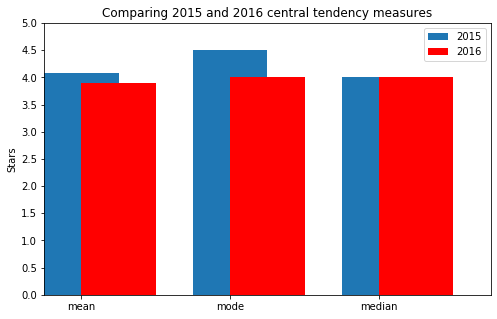

In [23]:
central_tendency['2015'].plot.bar(label = '2015')
central_tendency['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', rot = 0, figsize = (8,5))
plt.legend()
plt.yticks(np.arange(0, 5.1, .5))
plt.ylabel('Stars')
plt.title('Comparing 2015 and 2016 central tendency measures')